In [5]:
%config Completer.use_jedi = False
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, BatchNormalization, Dropout, Flatten
from tensorflow.keras import optimizers
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd
import seaborn as sb


df = pd.read_csv("B365.csv")

kf = StratifiedKFold(n_splits=10)

data = np.array(df.iloc[:,0:3])
classes = np.array(df['result'])

fold = 0
train_acc = 0
test_acc = 0
    
for train, test in kf.split(data,classes):
    fold+=1
    print(f"Fold #{fold}")
    data_train =  data[train]
    data_test = data[test]
    train_labels1 = classes[train]
    test_labels1 = classes[test]

    
    train_labels = pd.get_dummies(train_labels1, prefix="result")
    test_labels = pd.get_dummies(test_labels1, prefix="result")
    
    model = keras.Sequential([
        keras.layers.Flatten(input_shape = (3,1)),
        keras.layers.Dense(5,activation='sigmoid'),
        keras.layers.Dense(5,activation='sigmoid'),
        keras.layers.Dense(3,activation='sigmoid')
        ])
    
    learning_rate = 0.001
    opt = optimizers.Adam(learning_rate)
    
    model.compile(optimizer = opt, loss = "categorical_crossentropy", metrics = ["accuracy"] )
    with tf.device('/CPU:0'):    
        history = model.fit(data_train,train_labels, epochs=200, validation_data = (data_test, test_labels))
    
    print("\nTrain split:")
    train_loss, train_accuracy = model.evaluate(data_train, train_labels, verbose= 1)
    print("Accuracy : {}".format(train_accuracy))
    
    print("\nTest split:")
    test_loss, test_accuracy = model.evaluate(data_test, test_labels, verbose= 2)
    print("Accuracy : {}".format(test_accuracy))
    

    train_acc = train_acc + train_accuracy
    test_acc = test_acc + test_accuracy


print("\nThe final train accuracy is:{} ".format(train_acc/10))
print("\nThe final test accuracy is:{} ".format(test_acc/10))

Fold #1
Epoch 1/200
636/636 [==============================] - 0s 655us/step - loss: 1.0680 - accuracy: 0.4236 - val_loss: 1.0270 - val_accuracy: 0.5102
Epoch 2/200
636/636 [==============================] - 0s 511us/step - loss: 1.0076 - accuracy: 0.5244 - val_loss: 1.0018 - val_accuracy: 0.5212
Epoch 3/200
636/636 [==============================] - 0s 497us/step - loss: 0.9895 - accuracy: 0.5299 - val_loss: 0.9939 - val_accuracy: 0.5190
Epoch 4/200
636/636 [==============================] - 0s 479us/step - loss: 0.9839 - accuracy: 0.5291 - val_loss: 0.9910 - val_accuracy: 0.5190
Epoch 5/200
636/636 [==============================] - 0s 515us/step - loss: 0.9810 - accuracy: 0.5288 - val_loss: 0.9888 - val_accuracy: 0.5248
Epoch 6/200
636/636 [==============================] - 0s 502us/step - loss: 0.9793 - accuracy: 0.5302 - val_loss: 0.9871 - val_accuracy: 0.5199
Epoch 7/200
636/636 [==============================] - 0s 498us/step - loss: 0.9777 - accuracy: 0.5302 - val_loss: 0.9860 

636/636 [==============================] - 0s 510us/step - loss: 0.9714 - accuracy: 0.5322 - val_loss: 0.9829 - val_accuracy: 0.5217
Epoch 58/200
636/636 [==============================] - 0s 497us/step - loss: 0.9714 - accuracy: 0.5311 - val_loss: 0.9823 - val_accuracy: 0.5226
Epoch 59/200
636/636 [==============================] - 0s 532us/step - loss: 0.9712 - accuracy: 0.5325 - val_loss: 0.9823 - val_accuracy: 0.5230
Epoch 60/200
636/636 [==============================] - 0s 528us/step - loss: 0.9713 - accuracy: 0.5324 - val_loss: 0.9821 - val_accuracy: 0.5226
Epoch 61/200
636/636 [==============================] - 0s 504us/step - loss: 0.9713 - accuracy: 0.5330 - val_loss: 0.9821 - val_accuracy: 0.5235
Epoch 62/200
636/636 [==============================] - 0s 524us/step - loss: 0.9713 - accuracy: 0.5325 - val_loss: 0.9824 - val_accuracy: 0.5226
Epoch 63/200
636/636 [==============================] - 0s 508us/step - loss: 0.9715 - accuracy: 0.5322 - val_loss: 0.9826 - val_accuracy

636/636 [==============================] - 0s 524us/step - loss: 0.9710 - accuracy: 0.5334 - val_loss: 0.9825 - val_accuracy: 0.5204
Epoch 114/200
636/636 [==============================] - 0s 486us/step - loss: 0.9710 - accuracy: 0.5329 - val_loss: 0.9823 - val_accuracy: 0.5226
Epoch 115/200
636/636 [==============================] - 0s 501us/step - loss: 0.9712 - accuracy: 0.5328 - val_loss: 0.9816 - val_accuracy: 0.5265
Epoch 116/200
636/636 [==============================] - 0s 519us/step - loss: 0.9710 - accuracy: 0.5330 - val_loss: 0.9821 - val_accuracy: 0.5226
Epoch 117/200
636/636 [==============================] - 0s 508us/step - loss: 0.9710 - accuracy: 0.5325 - val_loss: 0.9819 - val_accuracy: 0.5226
Epoch 118/200
636/636 [==============================] - 0s 488us/step - loss: 0.9712 - accuracy: 0.5327 - val_loss: 0.9817 - val_accuracy: 0.5257
Epoch 119/200
636/636 [==============================] - 0s 499us/step - loss: 0.9710 - accuracy: 0.5322 - val_loss: 0.9818 - val_ac

Epoch 169/200
636/636 [==============================] - 0s 502us/step - loss: 0.9709 - accuracy: 0.5326 - val_loss: 0.9817 - val_accuracy: 0.5230
Epoch 170/200
636/636 [==============================] - 0s 499us/step - loss: 0.9708 - accuracy: 0.5329 - val_loss: 0.9817 - val_accuracy: 0.5230
Epoch 171/200
636/636 [==============================] - 0s 489us/step - loss: 0.9709 - accuracy: 0.5330 - val_loss: 0.9818 - val_accuracy: 0.5230
Epoch 172/200
636/636 [==============================] - 0s 505us/step - loss: 0.9708 - accuracy: 0.5332 - val_loss: 0.9817 - val_accuracy: 0.5265
Epoch 173/200
636/636 [==============================] - 0s 499us/step - loss: 0.9710 - accuracy: 0.5324 - val_loss: 0.9820 - val_accuracy: 0.5265
Epoch 174/200
636/636 [==============================] - 0s 497us/step - loss: 0.9710 - accuracy: 0.5326 - val_loss: 0.9816 - val_accuracy: 0.5257
Epoch 175/200
636/636 [==============================] - 0s 502us/step - loss: 0.9708 - accuracy: 0.5333 - val_loss: 0

636/636 [==============================] - 0s 490us/step - loss: 0.9744 - accuracy: 0.5288 - val_loss: 0.9721 - val_accuracy: 0.5358
Epoch 24/200
636/636 [==============================] - 0s 497us/step - loss: 0.9742 - accuracy: 0.5284 - val_loss: 0.9728 - val_accuracy: 0.5358
Epoch 25/200
636/636 [==============================] - 0s 501us/step - loss: 0.9739 - accuracy: 0.5305 - val_loss: 0.9726 - val_accuracy: 0.5358
Epoch 26/200
636/636 [==============================] - 0s 498us/step - loss: 0.9741 - accuracy: 0.5303 - val_loss: 0.9724 - val_accuracy: 0.5376
Epoch 27/200
636/636 [==============================] - 0s 489us/step - loss: 0.9740 - accuracy: 0.5303 - val_loss: 0.9718 - val_accuracy: 0.5389
Epoch 28/200
636/636 [==============================] - 0s 479us/step - loss: 0.9740 - accuracy: 0.5288 - val_loss: 0.9716 - val_accuracy: 0.5363
Epoch 29/200
636/636 [==============================] - 0s 500us/step - loss: 0.9739 - accuracy: 0.5303 - val_loss: 0.9733 - val_accuracy

Epoch 79/200
636/636 [==============================] - 0s 505us/step - loss: 0.9721 - accuracy: 0.5305 - val_loss: 0.9720 - val_accuracy: 0.5363
Epoch 80/200
636/636 [==============================] - 0s 466us/step - loss: 0.9723 - accuracy: 0.5316 - val_loss: 0.9720 - val_accuracy: 0.5394
Epoch 81/200
636/636 [==============================] - 0s 489us/step - loss: 0.9718 - accuracy: 0.5313 - val_loss: 0.9727 - val_accuracy: 0.5354
Epoch 82/200
636/636 [==============================] - 0s 480us/step - loss: 0.9721 - accuracy: 0.5303 - val_loss: 0.9718 - val_accuracy: 0.5363
Epoch 83/200
636/636 [==============================] - 0s 502us/step - loss: 0.9719 - accuracy: 0.5305 - val_loss: 0.9735 - val_accuracy: 0.5354
Epoch 84/200
636/636 [==============================] - 0s 493us/step - loss: 0.9718 - accuracy: 0.5317 - val_loss: 0.9721 - val_accuracy: 0.5363
Epoch 85/200
636/636 [==============================] - 0s 497us/step - loss: 0.9718 - accuracy: 0.5299 - val_loss: 0.9723 -

Epoch 135/200
636/636 [==============================] - 0s 497us/step - loss: 0.9717 - accuracy: 0.5308 - val_loss: 0.9729 - val_accuracy: 0.5394
Epoch 136/200
636/636 [==============================] - 0s 502us/step - loss: 0.9714 - accuracy: 0.5326 - val_loss: 0.9729 - val_accuracy: 0.5376
Epoch 137/200
636/636 [==============================] - 0s 493us/step - loss: 0.9718 - accuracy: 0.5310 - val_loss: 0.9720 - val_accuracy: 0.5363
Epoch 138/200
636/636 [==============================] - 0s 472us/step - loss: 0.9717 - accuracy: 0.5320 - val_loss: 0.9719 - val_accuracy: 0.5358
Epoch 139/200
636/636 [==============================] - 0s 497us/step - loss: 0.9716 - accuracy: 0.5311 - val_loss: 0.9726 - val_accuracy: 0.5372
Epoch 140/200
636/636 [==============================] - 0s 501us/step - loss: 0.9715 - accuracy: 0.5306 - val_loss: 0.9727 - val_accuracy: 0.5394
Epoch 141/200
636/636 [==============================] - 0s 499us/step - loss: 0.9717 - accuracy: 0.5317 - val_loss: 0

636/636 [==============================] - 0s 490us/step - loss: 0.9714 - accuracy: 0.5314 - val_loss: 0.9737 - val_accuracy: 0.5394
Epoch 191/200
636/636 [==============================] - 0s 502us/step - loss: 0.9713 - accuracy: 0.5326 - val_loss: 0.9724 - val_accuracy: 0.5358
Epoch 192/200
636/636 [==============================] - 0s 499us/step - loss: 0.9714 - accuracy: 0.5313 - val_loss: 0.9719 - val_accuracy: 0.5363
Epoch 193/200
636/636 [==============================] - 0s 497us/step - loss: 0.9715 - accuracy: 0.5322 - val_loss: 0.9725 - val_accuracy: 0.5358
Epoch 194/200
636/636 [==============================] - 0s 477us/step - loss: 0.9715 - accuracy: 0.5319 - val_loss: 0.9721 - val_accuracy: 0.5363
Epoch 195/200
636/636 [==============================] - 0s 491us/step - loss: 0.9716 - accuracy: 0.5311 - val_loss: 0.9719 - val_accuracy: 0.5358
Epoch 196/200
636/636 [==============================] - 0s 484us/step - loss: 0.9714 - accuracy: 0.5321 - val_loss: 0.9717 - val_ac

636/636 [==============================] - 0s 497us/step - loss: 0.9703 - accuracy: 0.5315 - val_loss: 0.9988 - val_accuracy: 0.5281
Epoch 45/200
636/636 [==============================] - 0s 502us/step - loss: 0.9700 - accuracy: 0.5312 - val_loss: 1.0003 - val_accuracy: 0.5232
Epoch 46/200
636/636 [==============================] - 0s 522us/step - loss: 0.9701 - accuracy: 0.5316 - val_loss: 0.9996 - val_accuracy: 0.5237
Epoch 47/200
636/636 [==============================] - 0s 480us/step - loss: 0.9701 - accuracy: 0.5324 - val_loss: 0.9990 - val_accuracy: 0.5290
Epoch 48/200
636/636 [==============================] - 0s 511us/step - loss: 0.9699 - accuracy: 0.5318 - val_loss: 0.9989 - val_accuracy: 0.5286
Epoch 49/200
636/636 [==============================] - 0s 557us/step - loss: 0.9700 - accuracy: 0.5324 - val_loss: 0.9991 - val_accuracy: 0.5281
Epoch 50/200
636/636 [==============================] - 0s 537us/step - loss: 0.9701 - accuracy: 0.5326 - val_loss: 0.9992 - val_accuracy

636/636 [==============================] - 0s 521us/step - loss: 0.9693 - accuracy: 0.5327 - val_loss: 0.9981 - val_accuracy: 0.5272
Epoch 101/200
636/636 [==============================] - 0s 500us/step - loss: 0.9695 - accuracy: 0.5317 - val_loss: 0.9987 - val_accuracy: 0.5277
Epoch 102/200
636/636 [==============================] - 0s 539us/step - loss: 0.9693 - accuracy: 0.5319 - val_loss: 0.9993 - val_accuracy: 0.5241
Epoch 103/200
636/636 [==============================] - 0s 527us/step - loss: 0.9696 - accuracy: 0.5324 - val_loss: 0.9982 - val_accuracy: 0.5286
Epoch 104/200
636/636 [==============================] - 0s 552us/step - loss: 0.9693 - accuracy: 0.5324 - val_loss: 0.9988 - val_accuracy: 0.5290
Epoch 105/200
636/636 [==============================] - 0s 518us/step - loss: 0.9694 - accuracy: 0.5308 - val_loss: 0.9985 - val_accuracy: 0.5272
Epoch 106/200
636/636 [==============================] - 0s 500us/step - loss: 0.9692 - accuracy: 0.5316 - val_loss: 0.9991 - val_ac

Epoch 156/200
636/636 [==============================] - 0s 500us/step - loss: 0.9691 - accuracy: 0.5334 - val_loss: 0.9981 - val_accuracy: 0.5263
Epoch 157/200
636/636 [==============================] - 0s 500us/step - loss: 0.9691 - accuracy: 0.5323 - val_loss: 0.9981 - val_accuracy: 0.5268
Epoch 158/200
636/636 [==============================] - 0s 527us/step - loss: 0.9691 - accuracy: 0.5332 - val_loss: 0.9980 - val_accuracy: 0.5263
Epoch 159/200
636/636 [==============================] - 0s 520us/step - loss: 0.9692 - accuracy: 0.5321 - val_loss: 0.9980 - val_accuracy: 0.5263
Epoch 160/200
636/636 [==============================] - 0s 500us/step - loss: 0.9693 - accuracy: 0.5328 - val_loss: 0.9987 - val_accuracy: 0.5294
Epoch 161/200
636/636 [==============================] - 0s 522us/step - loss: 0.9689 - accuracy: 0.5336 - val_loss: 0.9986 - val_accuracy: 0.5268
Epoch 162/200
636/636 [==============================] - 0s 500us/step - loss: 0.9691 - accuracy: 0.5323 - val_loss: 1

636/636 [==============================] - 0s 500us/step - loss: 0.9740 - accuracy: 0.5324 - val_loss: 1.0055 - val_accuracy: 0.5082
Epoch 11/200
636/636 [==============================] - 0s 498us/step - loss: 0.9736 - accuracy: 0.5334 - val_loss: 1.0058 - val_accuracy: 0.5091
Epoch 12/200
636/636 [==============================] - 0s 522us/step - loss: 0.9728 - accuracy: 0.5342 - val_loss: 1.0060 - val_accuracy: 0.5069
Epoch 13/200
636/636 [==============================] - 0s 500us/step - loss: 0.9725 - accuracy: 0.5342 - val_loss: 1.0048 - val_accuracy: 0.5091
Epoch 14/200
636/636 [==============================] - 0s 504us/step - loss: 0.9723 - accuracy: 0.5338 - val_loss: 1.0045 - val_accuracy: 0.5073
Epoch 15/200
636/636 [==============================] - 0s 523us/step - loss: 0.9720 - accuracy: 0.5339 - val_loss: 1.0056 - val_accuracy: 0.5091
Epoch 16/200
636/636 [==============================] - 0s 489us/step - loss: 0.9717 - accuracy: 0.5340 - val_loss: 1.0048 - val_accuracy

636/636 [==============================] - 0s 485us/step - loss: 0.9693 - accuracy: 0.5343 - val_loss: 1.0042 - val_accuracy: 0.5091
Epoch 67/200
636/636 [==============================] - 0s 500us/step - loss: 0.9693 - accuracy: 0.5341 - val_loss: 1.0043 - val_accuracy: 0.5091
Epoch 68/200
636/636 [==============================] - 0s 498us/step - loss: 0.9695 - accuracy: 0.5353 - val_loss: 1.0031 - val_accuracy: 0.5082
Epoch 69/200
636/636 [==============================] - 0s 543us/step - loss: 0.9694 - accuracy: 0.5339 - val_loss: 1.0034 - val_accuracy: 0.5082
Epoch 70/200
636/636 [==============================] - 0s 536us/step - loss: 0.9694 - accuracy: 0.5342 - val_loss: 1.0035 - val_accuracy: 0.5091
Epoch 71/200
636/636 [==============================] - 0s 490us/step - loss: 0.9694 - accuracy: 0.5336 - val_loss: 1.0043 - val_accuracy: 0.5100
Epoch 72/200
636/636 [==============================] - 0s 498us/step - loss: 0.9692 - accuracy: 0.5342 - val_loss: 1.0031 - val_accuracy

636/636 [==============================] - 0s 518us/step - loss: 0.9692 - accuracy: 0.5346 - val_loss: 1.0030 - val_accuracy: 0.5082
Epoch 123/200
636/636 [==============================] - 0s 522us/step - loss: 0.9690 - accuracy: 0.5350 - val_loss: 1.0040 - val_accuracy: 0.5077
Epoch 124/200
636/636 [==============================] - 0s 514us/step - loss: 0.9691 - accuracy: 0.5339 - val_loss: 1.0037 - val_accuracy: 0.5100
Epoch 125/200
636/636 [==============================] - 0s 530us/step - loss: 0.9692 - accuracy: 0.5351 - val_loss: 1.0036 - val_accuracy: 0.5086
Epoch 126/200
636/636 [==============================] - 0s 538us/step - loss: 0.9693 - accuracy: 0.5338 - val_loss: 1.0036 - val_accuracy: 0.5060
Epoch 127/200
636/636 [==============================] - 0s 525us/step - loss: 0.9691 - accuracy: 0.5340 - val_loss: 1.0036 - val_accuracy: 0.5082
Epoch 128/200
636/636 [==============================] - 0s 517us/step - loss: 0.9690 - accuracy: 0.5337 - val_loss: 1.0037 - val_ac

Epoch 178/200
636/636 [==============================] - 0s 499us/step - loss: 0.9688 - accuracy: 0.5341 - val_loss: 1.0040 - val_accuracy: 0.5069
Epoch 179/200
636/636 [==============================] - 0s 499us/step - loss: 0.9692 - accuracy: 0.5346 - val_loss: 1.0029 - val_accuracy: 0.5086
Epoch 180/200
636/636 [==============================] - 0s 532us/step - loss: 0.9690 - accuracy: 0.5343 - val_loss: 1.0031 - val_accuracy: 0.5091
Epoch 181/200
636/636 [==============================] - 0s 521us/step - loss: 0.9689 - accuracy: 0.5338 - val_loss: 1.0036 - val_accuracy: 0.5069
Epoch 182/200
636/636 [==============================] - 0s 512us/step - loss: 0.9690 - accuracy: 0.5341 - val_loss: 1.0031 - val_accuracy: 0.5100
Epoch 183/200
636/636 [==============================] - 0s 497us/step - loss: 0.9689 - accuracy: 0.5336 - val_loss: 1.0035 - val_accuracy: 0.5100
Epoch 184/200
636/636 [==============================] - 0s 501us/step - loss: 0.9692 - accuracy: 0.5335 - val_loss: 1

636/636 [==============================] - 0s 485us/step - loss: 0.9719 - accuracy: 0.5325 - val_loss: 0.9865 - val_accuracy: 0.5250
Epoch 33/200
636/636 [==============================] - 0s 529us/step - loss: 0.9718 - accuracy: 0.5321 - val_loss: 0.9865 - val_accuracy: 0.5268
Epoch 34/200
636/636 [==============================] - 0s 498us/step - loss: 0.9715 - accuracy: 0.5324 - val_loss: 0.9872 - val_accuracy: 0.5228
Epoch 35/200
636/636 [==============================] - 0s 490us/step - loss: 0.9719 - accuracy: 0.5310 - val_loss: 0.9863 - val_accuracy: 0.5255
Epoch 36/200
636/636 [==============================] - 0s 536us/step - loss: 0.9718 - accuracy: 0.5323 - val_loss: 0.9864 - val_accuracy: 0.5272
Epoch 37/200
636/636 [==============================] - 0s 483us/step - loss: 0.9715 - accuracy: 0.5324 - val_loss: 0.9860 - val_accuracy: 0.5281
Epoch 38/200
636/636 [==============================] - 0s 531us/step - loss: 0.9716 - accuracy: 0.5319 - val_loss: 0.9864 - val_accuracy

636/636 [==============================] - 0s 528us/step - loss: 0.9706 - accuracy: 0.5325 - val_loss: 0.9859 - val_accuracy: 0.5272
Epoch 89/200
636/636 [==============================] - 0s 545us/step - loss: 0.9706 - accuracy: 0.5313 - val_loss: 0.9858 - val_accuracy: 0.5272
Epoch 90/200
636/636 [==============================] - 0s 530us/step - loss: 0.9704 - accuracy: 0.5322 - val_loss: 0.9862 - val_accuracy: 0.5250
Epoch 91/200
636/636 [==============================] - 0s 493us/step - loss: 0.9708 - accuracy: 0.5331 - val_loss: 0.9870 - val_accuracy: 0.5290
Epoch 92/200
636/636 [==============================] - 0s 529us/step - loss: 0.9707 - accuracy: 0.5331 - val_loss: 0.9860 - val_accuracy: 0.5277
Epoch 93/200
636/636 [==============================] - 0s 511us/step - loss: 0.9705 - accuracy: 0.5321 - val_loss: 0.9860 - val_accuracy: 0.5272
Epoch 94/200
636/636 [==============================] - 0s 498us/step - loss: 0.9708 - accuracy: 0.5320 - val_loss: 0.9858 - val_accuracy

Epoch 144/200
636/636 [==============================] - 0s 498us/step - loss: 0.9704 - accuracy: 0.5330 - val_loss: 0.9866 - val_accuracy: 0.5224
Epoch 145/200
636/636 [==============================] - 0s 498us/step - loss: 0.9703 - accuracy: 0.5336 - val_loss: 0.9867 - val_accuracy: 0.5219
Epoch 146/200
636/636 [==============================] - 0s 500us/step - loss: 0.9702 - accuracy: 0.5322 - val_loss: 0.9864 - val_accuracy: 0.5268
Epoch 147/200
636/636 [==============================] - 0s 498us/step - loss: 0.9705 - accuracy: 0.5322 - val_loss: 0.9863 - val_accuracy: 0.5259
Epoch 148/200
636/636 [==============================] - 0s 503us/step - loss: 0.9704 - accuracy: 0.5321 - val_loss: 0.9868 - val_accuracy: 0.5241
Epoch 149/200
636/636 [==============================] - 0s 495us/step - loss: 0.9703 - accuracy: 0.5327 - val_loss: 0.9881 - val_accuracy: 0.5219
Epoch 150/200
636/636 [==============================] - 0s 499us/step - loss: 0.9704 - accuracy: 0.5340 - val_loss: 0

Epoch 200/200
636/636 [==============================] - 0s 499us/step - loss: 0.9702 - accuracy: 0.5326 - val_loss: 0.9875 - val_accuracy: 0.5281

Train split:
636/636 [==============================] - 0s 364us/step - loss: 0.9696 - accuracy: 0.5333
Accuracy : 0.5332710146903992

Test split:
71/71 - 0s - loss: 0.9875 - accuracy: 0.5281
Accuracy : 0.5281097888946533
Fold #6
Epoch 1/200
636/636 [==============================] - 0s 681us/step - loss: 1.0657 - accuracy: 0.4425 - val_loss: 1.0441 - val_accuracy: 0.4591
Epoch 2/200
636/636 [==============================] - 0s 491us/step - loss: 1.0251 - accuracy: 0.4964 - val_loss: 1.0021 - val_accuracy: 0.5383
Epoch 3/200
636/636 [==============================] - 0s 518us/step - loss: 0.9974 - accuracy: 0.5266 - val_loss: 0.9829 - val_accuracy: 0.5392
Epoch 4/200
636/636 [==============================] - 0s 535us/step - loss: 0.9896 - accuracy: 0.5266 - val_loss: 0.9781 - val_accuracy: 0.5392
Epoch 5/200
636/636 [=====================

Epoch 53/200
636/636 [==============================] - 0s 509us/step - loss: 0.9739 - accuracy: 0.5298 - val_loss: 0.9662 - val_accuracy: 0.5401
Epoch 54/200
636/636 [==============================] - 0s 532us/step - loss: 0.9736 - accuracy: 0.5305 - val_loss: 0.9674 - val_accuracy: 0.5409
Epoch 55/200
636/636 [==============================] - 0s 486us/step - loss: 0.9735 - accuracy: 0.5305 - val_loss: 0.9664 - val_accuracy: 0.5401
Epoch 56/200
636/636 [==============================] - 0s 500us/step - loss: 0.9736 - accuracy: 0.5310 - val_loss: 0.9661 - val_accuracy: 0.5418
Epoch 57/200
636/636 [==============================] - 0s 498us/step - loss: 0.9735 - accuracy: 0.5311 - val_loss: 0.9668 - val_accuracy: 0.5401
Epoch 58/200
636/636 [==============================] - 0s 529us/step - loss: 0.9738 - accuracy: 0.5304 - val_loss: 0.9669 - val_accuracy: 0.5401
Epoch 59/200
636/636 [==============================] - 0s 490us/step - loss: 0.9733 - accuracy: 0.5308 - val_loss: 0.9661 -

636/636 [==============================] - 0s 516us/step - loss: 0.9733 - accuracy: 0.5310 - val_loss: 0.9650 - val_accuracy: 0.5392
Epoch 110/200
636/636 [==============================] - 0s 522us/step - loss: 0.9730 - accuracy: 0.5308 - val_loss: 0.9657 - val_accuracy: 0.5405
Epoch 111/200
636/636 [==============================] - 0s 500us/step - loss: 0.9732 - accuracy: 0.5315 - val_loss: 0.9660 - val_accuracy: 0.5409
Epoch 112/200
636/636 [==============================] - 0s 531us/step - loss: 0.9733 - accuracy: 0.5314 - val_loss: 0.9655 - val_accuracy: 0.5401
Epoch 113/200
636/636 [==============================] - 0s 488us/step - loss: 0.9730 - accuracy: 0.5302 - val_loss: 0.9653 - val_accuracy: 0.5392
Epoch 114/200
636/636 [==============================] - 0s 528us/step - loss: 0.9731 - accuracy: 0.5319 - val_loss: 0.9649 - val_accuracy: 0.5405
Epoch 115/200
636/636 [==============================] - 0s 516us/step - loss: 0.9731 - accuracy: 0.5297 - val_loss: 0.9652 - val_ac

Epoch 165/200
636/636 [==============================] - 0s 490us/step - loss: 0.9730 - accuracy: 0.5306 - val_loss: 0.9646 - val_accuracy: 0.5401
Epoch 166/200
636/636 [==============================] - 0s 524us/step - loss: 0.9730 - accuracy: 0.5313 - val_loss: 0.9644 - val_accuracy: 0.5401
Epoch 167/200
636/636 [==============================] - 0s 498us/step - loss: 0.9730 - accuracy: 0.5313 - val_loss: 0.9643 - val_accuracy: 0.5396
Epoch 168/200
636/636 [==============================] - 0s 534us/step - loss: 0.9732 - accuracy: 0.5303 - val_loss: 0.9643 - val_accuracy: 0.5405
Epoch 169/200
636/636 [==============================] - 0s 486us/step - loss: 0.9730 - accuracy: 0.5321 - val_loss: 0.9641 - val_accuracy: 0.5401
Epoch 170/200
636/636 [==============================] - 0s 524us/step - loss: 0.9728 - accuracy: 0.5311 - val_loss: 0.9646 - val_accuracy: 0.5405
Epoch 171/200
636/636 [==============================] - 0s 498us/step - loss: 0.9730 - accuracy: 0.5306 - val_loss: 0

636/636 [==============================] - 0s 498us/step - loss: 0.9756 - accuracy: 0.5294 - val_loss: 0.9598 - val_accuracy: 0.5423
Epoch 20/200
636/636 [==============================] - 0s 523us/step - loss: 0.9754 - accuracy: 0.5300 - val_loss: 0.9598 - val_accuracy: 0.5423
Epoch 21/200
636/636 [==============================] - 0s 499us/step - loss: 0.9753 - accuracy: 0.5305 - val_loss: 0.9599 - val_accuracy: 0.5423
Epoch 22/200
636/636 [==============================] - 0s 522us/step - loss: 0.9752 - accuracy: 0.5312 - val_loss: 0.9600 - val_accuracy: 0.5432
Epoch 23/200
636/636 [==============================] - 0s 500us/step - loss: 0.9753 - accuracy: 0.5300 - val_loss: 0.9598 - val_accuracy: 0.5423
Epoch 24/200
636/636 [==============================] - 0s 498us/step - loss: 0.9752 - accuracy: 0.5303 - val_loss: 0.9611 - val_accuracy: 0.5467
Epoch 25/200
636/636 [==============================] - 0s 567us/step - loss: 0.9752 - accuracy: 0.5296 - val_loss: 0.9592 - val_accuracy

636/636 [==============================] - 0s 557us/step - loss: 0.9737 - accuracy: 0.5298 - val_loss: 0.9585 - val_accuracy: 0.5432
Epoch 76/200
636/636 [==============================] - 0s 503us/step - loss: 0.9736 - accuracy: 0.5309 - val_loss: 0.9579 - val_accuracy: 0.5427
Epoch 77/200
636/636 [==============================] - 0s 495us/step - loss: 0.9737 - accuracy: 0.5318 - val_loss: 0.9608 - val_accuracy: 0.5467
Epoch 78/200
636/636 [==============================] - 0s 532us/step - loss: 0.9735 - accuracy: 0.5306 - val_loss: 0.9603 - val_accuracy: 0.5476
Epoch 79/200
636/636 [==============================] - 0s 486us/step - loss: 0.9734 - accuracy: 0.5312 - val_loss: 0.9594 - val_accuracy: 0.5440
Epoch 80/200
636/636 [==============================] - 0s 500us/step - loss: 0.9735 - accuracy: 0.5293 - val_loss: 0.9610 - val_accuracy: 0.5440
Epoch 81/200
636/636 [==============================] - 0s 490us/step - loss: 0.9734 - accuracy: 0.5305 - val_loss: 0.9595 - val_accuracy

Epoch 131/200
636/636 [==============================] - 0s 501us/step - loss: 0.9733 - accuracy: 0.5309 - val_loss: 0.9598 - val_accuracy: 0.5432
Epoch 132/200
636/636 [==============================] - 0s 519us/step - loss: 0.9728 - accuracy: 0.5316 - val_loss: 0.9587 - val_accuracy: 0.5423
Epoch 133/200
636/636 [==============================] - 0s 499us/step - loss: 0.9730 - accuracy: 0.5308 - val_loss: 0.9595 - val_accuracy: 0.5423
Epoch 134/200
636/636 [==============================] - 0s 500us/step - loss: 0.9730 - accuracy: 0.5303 - val_loss: 0.9600 - val_accuracy: 0.5423
Epoch 135/200
636/636 [==============================] - 0s 506us/step - loss: 0.9734 - accuracy: 0.5299 - val_loss: 0.9618 - val_accuracy: 0.5432
Epoch 136/200
636/636 [==============================] - 0s 515us/step - loss: 0.9731 - accuracy: 0.5319 - val_loss: 0.9582 - val_accuracy: 0.5449
Epoch 137/200
636/636 [==============================] - 0s 500us/step - loss: 0.9735 - accuracy: 0.5299 - val_loss: 0

Epoch 187/200
636/636 [==============================] - 0s 522us/step - loss: 0.9731 - accuracy: 0.5314 - val_loss: 0.9607 - val_accuracy: 0.5427
Epoch 188/200
636/636 [==============================] - 0s 500us/step - loss: 0.9731 - accuracy: 0.5315 - val_loss: 0.9599 - val_accuracy: 0.5423
Epoch 189/200
636/636 [==============================] - 0s 498us/step - loss: 0.9731 - accuracy: 0.5311 - val_loss: 0.9622 - val_accuracy: 0.5467
Epoch 190/200
636/636 [==============================] - 0s 528us/step - loss: 0.9732 - accuracy: 0.5311 - val_loss: 0.9594 - val_accuracy: 0.5414
Epoch 191/200
636/636 [==============================] - 0s 490us/step - loss: 0.9731 - accuracy: 0.5314 - val_loss: 0.9602 - val_accuracy: 0.5427
Epoch 192/200
636/636 [==============================] - 0s 528us/step - loss: 0.9729 - accuracy: 0.5309 - val_loss: 0.9593 - val_accuracy: 0.5467
Epoch 193/200
636/636 [==============================] - 0s 491us/step - loss: 0.9731 - accuracy: 0.5311 - val_loss: 0

636/636 [==============================] - 0s 523us/step - loss: 0.9773 - accuracy: 0.5306 - val_loss: 0.9381 - val_accuracy: 0.5476
Epoch 42/200
636/636 [==============================] - 0s 500us/step - loss: 0.9773 - accuracy: 0.5295 - val_loss: 0.9384 - val_accuracy: 0.5476
Epoch 43/200
636/636 [==============================] - 0s 498us/step - loss: 0.9775 - accuracy: 0.5288 - val_loss: 0.9398 - val_accuracy: 0.5440
Epoch 44/200
636/636 [==============================] - 0s 529us/step - loss: 0.9771 - accuracy: 0.5311 - val_loss: 0.9377 - val_accuracy: 0.5467
Epoch 45/200
636/636 [==============================] - 0s 490us/step - loss: 0.9773 - accuracy: 0.5299 - val_loss: 0.9400 - val_accuracy: 0.5454
Epoch 46/200
636/636 [==============================] - 0s 498us/step - loss: 0.9773 - accuracy: 0.5303 - val_loss: 0.9384 - val_accuracy: 0.5480
Epoch 47/200
636/636 [==============================] - 0s 522us/step - loss: 0.9773 - accuracy: 0.5306 - val_loss: 0.9374 - val_accuracy

636/636 [==============================] - 0s 523us/step - loss: 0.9762 - accuracy: 0.5295 - val_loss: 0.9393 - val_accuracy: 0.5480
Epoch 98/200
636/636 [==============================] - 0s 498us/step - loss: 0.9762 - accuracy: 0.5296 - val_loss: 0.9387 - val_accuracy: 0.5476
Epoch 99/200
636/636 [==============================] - 0s 500us/step - loss: 0.9762 - accuracy: 0.5306 - val_loss: 0.9374 - val_accuracy: 0.5476
Epoch 100/200
636/636 [==============================] - 0s 497us/step - loss: 0.9765 - accuracy: 0.5308 - val_loss: 0.9395 - val_accuracy: 0.5454
Epoch 101/200
636/636 [==============================] - 0s 498us/step - loss: 0.9761 - accuracy: 0.5306 - val_loss: 0.9392 - val_accuracy: 0.5476
Epoch 102/200
636/636 [==============================] - 0s 501us/step - loss: 0.9761 - accuracy: 0.5302 - val_loss: 0.9374 - val_accuracy: 0.5480
Epoch 103/200
636/636 [==============================] - 0s 503us/step - loss: 0.9760 - accuracy: 0.5287 - val_loss: 0.9376 - val_accu

Epoch 153/200
636/636 [==============================] - 0s 496us/step - loss: 0.9758 - accuracy: 0.5303 - val_loss: 0.9378 - val_accuracy: 0.5476
Epoch 154/200
636/636 [==============================] - 0s 522us/step - loss: 0.9756 - accuracy: 0.5308 - val_loss: 0.9425 - val_accuracy: 0.5427
Epoch 155/200
636/636 [==============================] - 0s 500us/step - loss: 0.9758 - accuracy: 0.5303 - val_loss: 0.9405 - val_accuracy: 0.5454
Epoch 156/200
636/636 [==============================] - 0s 498us/step - loss: 0.9757 - accuracy: 0.5287 - val_loss: 0.9374 - val_accuracy: 0.5485
Epoch 157/200
636/636 [==============================] - 0s 506us/step - loss: 0.9756 - accuracy: 0.5306 - val_loss: 0.9395 - val_accuracy: 0.5480
Epoch 158/200
636/636 [==============================] - 0s 517us/step - loss: 0.9759 - accuracy: 0.5292 - val_loss: 0.9383 - val_accuracy: 0.5467
Epoch 159/200
636/636 [==============================] - 0s 497us/step - loss: 0.9760 - accuracy: 0.5304 - val_loss: 0

636/636 [==============================] - 0s 531us/step - loss: 0.9811 - accuracy: 0.5286 - val_loss: 0.9796 - val_accuracy: 0.5259
Epoch 8/200
636/636 [==============================] - 0s 488us/step - loss: 0.9792 - accuracy: 0.5289 - val_loss: 0.9773 - val_accuracy: 0.5259
Epoch 9/200
636/636 [==============================] - 0s 498us/step - loss: 0.9782 - accuracy: 0.5289 - val_loss: 0.9760 - val_accuracy: 0.5255
Epoch 10/200
636/636 [==============================] - 0s 500us/step - loss: 0.9772 - accuracy: 0.5287 - val_loss: 0.9751 - val_accuracy: 0.5290
Epoch 11/200
636/636 [==============================] - 0s 498us/step - loss: 0.9767 - accuracy: 0.5287 - val_loss: 0.9747 - val_accuracy: 0.5246
Epoch 12/200
636/636 [==============================] - 0s 498us/step - loss: 0.9762 - accuracy: 0.5287 - val_loss: 0.9743 - val_accuracy: 0.5237
Epoch 13/200
636/636 [==============================] - 0s 523us/step - loss: 0.9759 - accuracy: 0.5300 - val_loss: 0.9763 - val_accuracy: 

636/636 [==============================] - 0s 500us/step - loss: 0.9728 - accuracy: 0.5311 - val_loss: 0.9717 - val_accuracy: 0.5330
Epoch 64/200
636/636 [==============================] - 0s 498us/step - loss: 0.9728 - accuracy: 0.5312 - val_loss: 0.9712 - val_accuracy: 0.5294
Epoch 65/200
636/636 [==============================] - 0s 547us/step - loss: 0.9725 - accuracy: 0.5311 - val_loss: 0.9701 - val_accuracy: 0.5321
Epoch 66/200
636/636 [==============================] - 0s 506us/step - loss: 0.9727 - accuracy: 0.5316 - val_loss: 0.9702 - val_accuracy: 0.5312
Epoch 67/200
636/636 [==============================] - 0s 515us/step - loss: 0.9726 - accuracy: 0.5320 - val_loss: 0.9713 - val_accuracy: 0.5294
Epoch 68/200
636/636 [==============================] - 0s 498us/step - loss: 0.9726 - accuracy: 0.5314 - val_loss: 0.9705 - val_accuracy: 0.5312
Epoch 69/200
636/636 [==============================] - 0s 498us/step - loss: 0.9725 - accuracy: 0.5312 - val_loss: 0.9706 - val_accuracy

636/636 [==============================] - 0s 497us/step - loss: 0.9722 - accuracy: 0.5319 - val_loss: 0.9700 - val_accuracy: 0.5334
Epoch 120/200
636/636 [==============================] - 0s 500us/step - loss: 0.9723 - accuracy: 0.5312 - val_loss: 0.9702 - val_accuracy: 0.5321
Epoch 121/200
636/636 [==============================] - 0s 498us/step - loss: 0.9724 - accuracy: 0.5308 - val_loss: 0.9713 - val_accuracy: 0.5294
Epoch 122/200
636/636 [==============================] - 0s 498us/step - loss: 0.9723 - accuracy: 0.5311 - val_loss: 0.9698 - val_accuracy: 0.5272
Epoch 123/200
636/636 [==============================] - 0s 499us/step - loss: 0.9723 - accuracy: 0.5324 - val_loss: 0.9700 - val_accuracy: 0.5312
Epoch 124/200
636/636 [==============================] - 0s 498us/step - loss: 0.9721 - accuracy: 0.5330 - val_loss: 0.9701 - val_accuracy: 0.5317
Epoch 125/200
636/636 [==============================] - 0s 498us/step - loss: 0.9723 - accuracy: 0.5322 - val_loss: 0.9699 - val_ac

Epoch 175/200
636/636 [==============================] - 0s 497us/step - loss: 0.9721 - accuracy: 0.5310 - val_loss: 0.9706 - val_accuracy: 0.5312
Epoch 176/200
636/636 [==============================] - 0s 498us/step - loss: 0.9721 - accuracy: 0.5315 - val_loss: 0.9714 - val_accuracy: 0.5290
Epoch 177/200
636/636 [==============================] - 0s 523us/step - loss: 0.9721 - accuracy: 0.5324 - val_loss: 0.9692 - val_accuracy: 0.5317
Epoch 178/200
636/636 [==============================] - 0s 500us/step - loss: 0.9722 - accuracy: 0.5317 - val_loss: 0.9708 - val_accuracy: 0.5294
Epoch 179/200
636/636 [==============================] - 0s 498us/step - loss: 0.9720 - accuracy: 0.5320 - val_loss: 0.9696 - val_accuracy: 0.5321
Epoch 180/200
636/636 [==============================] - 0s 498us/step - loss: 0.9720 - accuracy: 0.5324 - val_loss: 0.9717 - val_accuracy: 0.5294
Epoch 181/200
636/636 [==============================] - 0s 500us/step - loss: 0.9720 - accuracy: 0.5312 - val_loss: 0

636/636 [==============================] - 0s 498us/step - loss: 0.9754 - accuracy: 0.5306 - val_loss: 0.9519 - val_accuracy: 0.5356
Epoch 30/200
636/636 [==============================] - 0s 531us/step - loss: 0.9756 - accuracy: 0.5324 - val_loss: 0.9527 - val_accuracy: 0.5392
Epoch 31/200
636/636 [==============================] - 0s 505us/step - loss: 0.9752 - accuracy: 0.5313 - val_loss: 0.9519 - val_accuracy: 0.5361
Epoch 32/200
636/636 [==============================] - 0s 505us/step - loss: 0.9753 - accuracy: 0.5306 - val_loss: 0.9537 - val_accuracy: 0.5392
Epoch 33/200
636/636 [==============================] - 0s 528us/step - loss: 0.9752 - accuracy: 0.5313 - val_loss: 0.9525 - val_accuracy: 0.5392
Epoch 34/200
636/636 [==============================] - 0s 493us/step - loss: 0.9753 - accuracy: 0.5306 - val_loss: 0.9517 - val_accuracy: 0.5361
Epoch 35/200
636/636 [==============================] - 0s 517us/step - loss: 0.9752 - accuracy: 0.5315 - val_loss: 0.9522 - val_accuracy

636/636 [==============================] - 0s 514us/step - loss: 0.9748 - accuracy: 0.5304 - val_loss: 0.9510 - val_accuracy: 0.5347
Epoch 86/200
636/636 [==============================] - 0s 500us/step - loss: 0.9748 - accuracy: 0.5311 - val_loss: 0.9508 - val_accuracy: 0.5356
Epoch 87/200
636/636 [==============================] - 0s 507us/step - loss: 0.9747 - accuracy: 0.5313 - val_loss: 0.9522 - val_accuracy: 0.5383
Epoch 88/200
636/636 [==============================] - 0s 514us/step - loss: 0.9748 - accuracy: 0.5315 - val_loss: 0.9503 - val_accuracy: 0.5361
Epoch 89/200
636/636 [==============================] - 0s 543us/step - loss: 0.9747 - accuracy: 0.5313 - val_loss: 0.9511 - val_accuracy: 0.5370
Epoch 90/200
636/636 [==============================] - 0s 518us/step - loss: 0.9749 - accuracy: 0.5307 - val_loss: 0.9514 - val_accuracy: 0.5356
Epoch 91/200
636/636 [==============================] - 0s 521us/step - loss: 0.9748 - accuracy: 0.5307 - val_loss: 0.9504 - val_accuracy

Epoch 141/200
636/636 [==============================] - 0s 529us/step - loss: 0.9745 - accuracy: 0.5315 - val_loss: 0.9501 - val_accuracy: 0.5343
Epoch 142/200
636/636 [==============================] - 0s 490us/step - loss: 0.9747 - accuracy: 0.5313 - val_loss: 0.9502 - val_accuracy: 0.5334
Epoch 143/200
636/636 [==============================] - 0s 536us/step - loss: 0.9746 - accuracy: 0.5322 - val_loss: 0.9518 - val_accuracy: 0.5365
Epoch 144/200
636/636 [==============================] - 0s 510us/step - loss: 0.9747 - accuracy: 0.5307 - val_loss: 0.9501 - val_accuracy: 0.5334
Epoch 145/200
636/636 [==============================] - 0s 498us/step - loss: 0.9746 - accuracy: 0.5322 - val_loss: 0.9505 - val_accuracy: 0.5370
Epoch 146/200
636/636 [==============================] - 0s 523us/step - loss: 0.9746 - accuracy: 0.5320 - val_loss: 0.9510 - val_accuracy: 0.5370
Epoch 147/200
636/636 [==============================] - 0s 500us/step - loss: 0.9746 - accuracy: 0.5312 - val_loss: 0

Epoch 197/200
636/636 [==============================] - 0s 498us/step - loss: 0.9743 - accuracy: 0.5314 - val_loss: 0.9502 - val_accuracy: 0.5334
Epoch 198/200
636/636 [==============================] - 0s 497us/step - loss: 0.9746 - accuracy: 0.5314 - val_loss: 0.9499 - val_accuracy: 0.5339
Epoch 199/200
636/636 [==============================] - 0s 522us/step - loss: 0.9744 - accuracy: 0.5326 - val_loss: 0.9499 - val_accuracy: 0.5334
Epoch 200/200
636/636 [==============================] - 0s 500us/step - loss: 0.9744 - accuracy: 0.5306 - val_loss: 0.9516 - val_accuracy: 0.5383

Train split:
636/636 [==============================] - 0s 353us/step - loss: 0.9746 - accuracy: 0.5298
Accuracy : 0.5298283696174622

Test split:
71/71 - 0s - loss: 0.9516 - accuracy: 0.5383
Accuracy : 0.5382912755012512

The final train accuracy is:0.5319631278514863 

The final test accuracy is:0.5327993273735047 


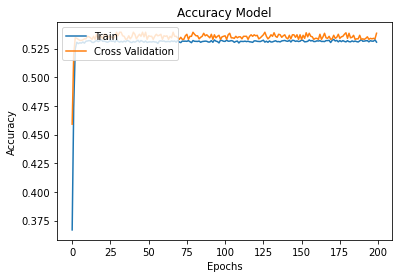

In [6]:
#See how the training went
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Accuracy Model")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(['Train', 'Cross Validation'], loc = 'upper left')
plt.show()

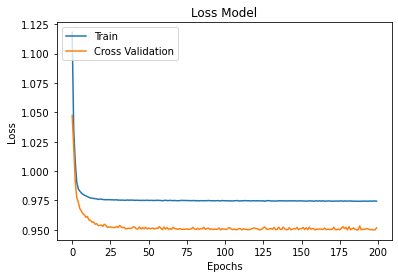

In [7]:
#See how the loss function went 
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Loss Model")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(['Train', 'Cross Validation'], loc = "upper left")
plt.show()

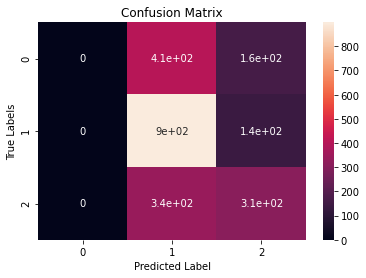

In [4]:
from sklearn.metrics import confusion_matrix
ax = plt.subplot()
predict_results = model.predict(data_test)

predict_results = predict_results.argmax(axis = 1)
cm = confusion_matrix(test_labels1, predict_results)
sb.heatmap(cm, annot = True, ax = ax);
ax.set_xlabel('Predicted Label');
ax.set_ylabel("True Labels");
ax.set_title("Confusion Matrix");